In [140]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [141]:
# Create list of all targets
dataset_path = "../../Dataset/speech_dataset"
all_targets  = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
#all_targets.remove("_background_noise_")

In [142]:
# Settings
feature_sets_path = "./"
feature_sets_filename = "mfcc.npz"
model_filename = "model.h5"
wake_word = "stop"

In [143]:
# Load Feature Sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))

In [144]:
# Assign Feature Sets

# [TRAINING]
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']

# [VALIDATION]
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']

In [145]:
# Look at Tensor Dimensions
print(x_train.shape)
print(x_val.shape)

(7769, 16, 16)
(976, 16, 16)


In [146]:
# Peek at labels
print(y_val)

[33. 28.  9. 30. 16.  1. 12. 11. 32. 32. 14.  7. 34. 20. 24.  1. 14. 33.
 11.  4. 25. 33. 34. 33. 32.  8. 21. 20. 28. 20. 31.  9. 31. 28. 25. 19.
 11. 18.  8. 12. 28. 32. 10. 30.  6. 32. 28. 23. 30.  4. 17.  9. 11. 16.
  3. 20. 25. 22. 16. 33.  7. 27. 14. 20.  1. 33. 28.  8. 34. 28. 19. 31.
 25.  0. 22.  3. 19. 11.  1. 18. 15.  5.  5. 22. 25. 16. 31. 32.  0. 31.
 14. 24. 27. 21. 32. 29. 22. 29. 33. 24.  8.  2. 32. 34. 18. 17. 33.  7.
 11. 19. 20.  1. 14. 20.  6. 29.  8. 24. 12. 17. 21. 14.  1. 12. 12. 24.
 22. 11. 25.  1. 31. 12. 11.  9. 33. 25. 12. 17.  1. 16. 24. 31. 11. 12.
 18. 27. 21. 17. 31. 18. 28.  3. 23. 30.  5. 16.  7. 23. 29. 11. 33. 33.
 22. 29. 10. 10. 25.  4. 34.  7. 32.  9. 31. 31. 32. 31. 26. 31. 32. 16.
 19. 22. 24. 33. 27. 16.  9. 24. 32.  3.  7. 19. 25.  6.  6. 20.  0. 14.
  2. 32.  2. 25. 17. 29. 19.  6.  9.  9. 20.  8. 20. 24.  9. 29. 22.  9.
  1. 33. 14. 33. 20.  1.  4.  1. 21. 16.  0. 34. 14. 14. 22.  7. 28. 18.
 12.  9. 17. 20. 29. 28.  1. 25. 19. 32.  3.  7.  7

In [147]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train         = np.equal(y_train, wake_word_index).astype('float64')
y_val           = np.equal(y_val, wake_word_index).astype('float64')

In [148]:
y_val

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [149]:
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.03483606557377049
0.9651639344262295


In [150]:
# Dimension of input data
print(x_train[0])

[[-5.90071960e+02 -5.89049011e+02 -4.72698273e+02 -1.45482391e+02
  -8.46519852e+00  1.37874870e+01 -1.36613712e+01 -4.96497688e+01
  -4.03163795e+01 -7.20003357e+01 -1.97946701e+02 -3.05725067e+02
  -3.81750549e+02 -4.31976990e+02 -4.67341339e+02 -4.91607941e+02]
 [ 2.42968321e+00  3.10460734e+00  8.10482941e+01  7.05710220e+01
   2.95022621e+01 -7.86245680e+00 -1.46863270e+01  2.10577354e+01
   2.47948532e+01  3.00140934e+01  4.41210327e+01  5.62711182e+01
   4.61920471e+01  2.22497215e+01  1.07050667e+01  1.41057930e+01]
 [-1.42181277e-01 -6.80013955e-01  6.05745239e+01  8.76058006e+00
  -2.84802284e+01 -5.39071121e+01 -5.87116890e+01 -5.15415039e+01
  -2.13740616e+01 -5.58893538e+00  8.73267078e+00  1.51271267e+01
  -7.73243856e+00 -2.88412933e+01 -3.69463081e+01 -3.34396477e+01]
 [-1.94975778e-01 -1.98572725e-01  2.57861176e+01 -3.56877594e+01
  -4.12023773e+01 -3.72617188e+01 -9.34825993e+00  1.63118343e+01
   2.97081108e+01  3.31191025e+01  4.17450790e+01  4.32040939e+01
   2.11

In [152]:
# CNN for IF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
shape = 16

# [TRAINING]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

# [VALIDATION]
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2], 1)

print(x_train.shape)
print(x_val.shape)

(7769, 16, 16, 1)
(976, 16, 16, 1)


In [153]:
# Input shape for CNN is size MFCC of 1 sample
sample_shape = x_train.shape[1:]
print(sample_shape)

(16, 16, 1)


In [154]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [155]:
# Display model
model.summary()

# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=3, 
                    batch_size=50, 
                    validation_data=(x_val, y_val))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

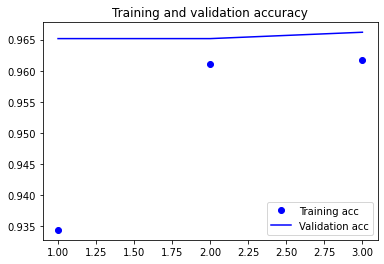

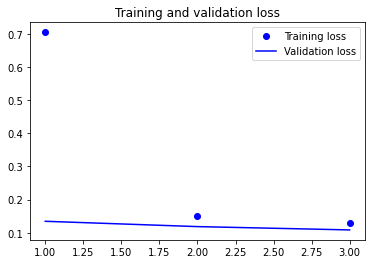

In [156]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [157]:
# Save the model as a file
models.save_model(model, model_filename)
models.save_model(model, "wake_word.model")

INFO:tensorflow:Assets written to: wake_word.model/assets


In [158]:
# See which are 'stop'
for idx, y in enumerate(y_val):
    if y == 1:
        print(idx)

50
105
119
137
147
202
236
281
340
361
366
406
407
422
437
443
444
488
499
553
564
569
572
587
624
686
689
720
758
771
784
820
962
975


In [159]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)

sample_shapes = x_val[7]
prediction = model.predict(np.expand_dims(sample_shapes, axis=0))
for i in range(100, 200):
    prediction = model.predict(np.expand_dims(x_val[i], 0))
    print('Answer:', y_val[i], ' Prediction:', prediction)

Answer: 0.0  Prediction: [[0.00563625]]
Answer: 0.0  Prediction: [[0.01696834]]
Answer: 0.0  Prediction: [[0.090534]]
Answer: 0.0  Prediction: [[0.11720553]]
Answer: 0.0  Prediction: [[0.0266026]]
Answer: 1.0  Prediction: [[0.25284415]]
Answer: 0.0  Prediction: [[0.0300889]]
Answer: 0.0  Prediction: [[0.09995422]]
Answer: 0.0  Prediction: [[0.00716954]]
Answer: 0.0  Prediction: [[0.02176753]]
Answer: 0.0  Prediction: [[0.03696403]]
Answer: 0.0  Prediction: [[0.00181448]]
Answer: 0.0  Prediction: [[0.00916272]]
Answer: 0.0  Prediction: [[0.01502958]]
Answer: 0.0  Prediction: [[0.00503725]]
Answer: 0.0  Prediction: [[0.0122391]]
Answer: 0.0  Prediction: [[3.1820247e-05]]
Answer: 0.0  Prediction: [[0.0350056]]
Answer: 0.0  Prediction: [[0.00059703]]
Answer: 1.0  Prediction: [[0.24626428]]
Answer: 0.0  Prediction: [[0.02797914]]
Answer: 0.0  Prediction: [[0.00270936]]
Answer: 0.0  Prediction: [[0.00077698]]
Answer: 0.0  Prediction: [[0.00543049]]
Answer: 0.0  Prediction: [[0.00073171]]
Ans

In [136]:
# Evaluate model with test set
model.evaluate(x=x_val, y=y_val)

31/31 [==============================] - 0s 3ms/step - loss: 0.1508 - acc: 0.9557


[0.15083429217338562, 0.9556701183319092]

In [139]:
import librosa
y,sr  = librosa.load("../../Dataset/speech_dataset/zero/0a2b400e_nohash_0.wav", 8000)
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=16).T,axis=0)

model.predict(np.expand_dims(mfccs.shape, 0))

ValueError: in user code:

    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/skynet/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
